Actividad por Ángela Córdoba.



---


Datos suministrados por GPT.


---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar las imágenes a valores entre 0 y 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convertir las etiquetas a codificación one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Crear el modelo
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Aplanar la imagen 28x28
model.add(Dense(128, activation='relu'))  # Capa oculta con 128 neuronas
model.add(Dense(10, activation='softmax'))  # Capa de salida con 10 neuronas (una por cada clase)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Entrenar el modelo
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,  # Usar el 20% de los datos para validación
                    verbose=1)  # Mostrar el progreso durante el entrenamiento

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8577 - loss: 0.4924 - val_accuracy: 0.9542 - val_loss: 0.1625
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9596 - loss: 0.1389 - val_accuracy: 0.9606 - val_loss: 0.1323
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9718 - loss: 0.0920 - val_accuracy: 0.9708 - val_loss: 0.0987
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9800 - loss: 0.0659 - val_accuracy: 0.9722 - val_loss: 0.0911
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9848 - loss: 0.0503 - val_accuracy: 0.9747 - val_loss: 0.0839
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9740 - val_loss: 0.0869
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9918 - loss: 0.0281 - val_accuracy: 0.9747 - val_loss: 0.0883
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9938 - loss: 0.0222

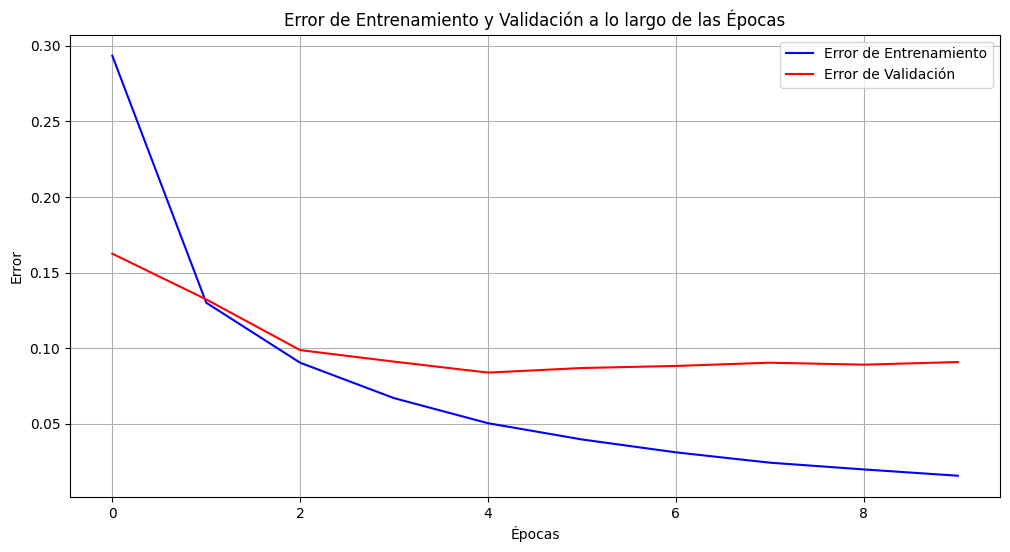

In [5]:
# Graficar los errores de entrenamiento y validación
plt.figure(figsize=(12, 6))

# Error de entrenamiento
plt.plot(history.history['loss'], label='Error de Entrenamiento', color='blue')

# Error de validación
plt.plot(history.history['val_loss'], label='Error de Validación', color='red')

# Añadir etiquetas y título
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.title('Error de Entrenamiento y Validación a lo largo de las Épocas')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()